# ** 7 Financial BackTesting**
파이썬을 활용한 금융분석

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. []의 문자에서 활용( [index], [:slicing]), 함수를 활용{for : 반복, if :판단, enumerate() :순번 integer 출력}
1. 재무제표 Web Crawling ==> type 변경 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. pd.to_datetime()
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df.column이름 &nbsp; | &nbsp; df['column이름']
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()
1. df.apply(lambda x: x ** 2)
1. pd.pivot_table(df,index = [], values = [], aggfunc = [], margins = True)

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; map, reduce, lambda, filter**
1. map & lambda : map(lambda x : str(x), [list])
1. map & lambda : list(map(lambda x : str(x), [list]))
1. map & lambda : <strike>[ map(lambda x : str(x), data) ]</strike>
1. Series & lambda : Series.apply(lambda x : str(x))
1. filter & lambda : list(filter(lambda x : x % 2 == 0,  data))
1. <strike>filter</strike> & DataFrame : DataFrame[ Series % 2 == 0 ]
1. reduce & lambda : reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])      # 데이터 차원축소

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

### **review &nbsp; Matplotlib**
1. DataFrame.loc['시작날짜':'종료날짜', :] : 주소 이름을 활용하여 인덱싱
1. DataFrame.iloc[1:10, : ] # 주소값으로 인덱싱
1. Series.plot(kind='line')  **# 'bar'**
1. Series.resample().plot()
1. Series.rolling().plot()
1. Series.ix['2018-01':'2018-03'].plot()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.plot(x축,y축,lw=1.5,label=); &nbsp;&nbsp; plt.legend(loc=); &nbsp;&nbsp; plt.show()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.subplot(121); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plt.subplot(122); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plot.show()


### **review &nbsp; bs4**
1. soup = BeautifulSoup(html_doc, 'lxml')
1. soup.tags.attrs &nbsp; | &nbsp; soup.tags.attrs() 
1. soup.tags.contents
1. soup.tags.string.replacewith()
1. soup.find('tag명') &nbsp; | &nbsp; soup.find_all('tag명')
1. soup.find_all('a')[0].get_text()
1. soup.find_all('태그',{'class':"클래스 속성"})
1. soup.find_all('태그', {'class':re.compile('속성명 일부')})
1. soup.body.descendants &nbsp; | &nbsp; soup.p.string.parent

### **review &nbsp; lxml**
1. XPath 는 'query language'로써 XML의 nodes 들을 선택하는데 용이
1. **'\\'** 와 **'\\\\'** 의 기능을 구분
1. from &nbsp; lxml.html &nbsp; import &nbsp; fromstring
1. fromstring(response.text).xpath("/html/body/div/h1")[0]

<br>
## **1 Financial BackTesting**
1. 이동평균선 전략을 과거데이터를 활용하여 Simulation 하기
1. Zipline. qtpylib 등 [link](https://github.com/search?utf8=%E2%9C%93&q=Python+Algorithmic+Trading&type=), 작년초 Yahoo Finance API의 변경으로 오류가 많음
1. **Zipline** 의 경우, Python 3.4/ pandas 0.18 / Yahoo APi Broken 이슈등으로 정상적 동작되지 않음
1. 가장 기본적인 형태의 모듈을 구현하여 간단하게 Test해보자
1. Source : https://github.com/Crypto-AI/Gemini

<br>
### **01 이동평균선을 활용하여 매수/ 매도시점 생성**
.rolling().mean()

In [1]:
# short_ma, long_ma  # 단기 이동평균, 장기 이동평균
def stock_check(code, period = '2Y', short_ma = 5, long_ma = 20):
    from googlefinance.get import get_data
    ohlc = get_data(code, period)
    ms = ohlc.Close.rolling(short_ma).mean()
    ml = ohlc.Close.rolling(long_ma).mean()
    ohlc['ma_' + str(short_ma) ] = ohlc['Close'].rolling(window=5,  center=False).mean()
    ohlc['ma_' + str(long_ma) ]  = ohlc['Close'].rolling(window=20, center=False).mean()
    ohlc['diff']  = ohlc['ma_' + str(short_ma)] - ohlc['ma_' + str(long_ma)]
    ohlc['buy']   = (ms>ml) & (ms.shift()<ml.shift())  # 이동평균선 교차상승 (조건만족시 True/False)
    ohlc['sell']  = (ms<ml) & (ms.shift()>ml.shift())  # 이동평균선 교차하락 (조건만족시 True/False)
    ohlc = ohlc.drop(columns='Code')
    return ohlc

In [2]:
code = 'NASDAQ:TSLA'
data = stock_check(code) #  , 
data[data.sell].head(3)

,Open,High,Low,Close,Volume,ma_5,ma_20,diff,buy,sell
Date,,,,,,,,,,
2016-06-16,216.95,221.90,215.13,217.70,2908522,219.736,220.8245,-1.0885,False,True
2016-08-12,226.17,227.57,223.41,224.91,1880936,227.166,227.2945,-0.1285,False,True
2016-10-11,201.35,204.14,199.66,200.95,3316297,203.686,204.3145,-0.6285,False,True


/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


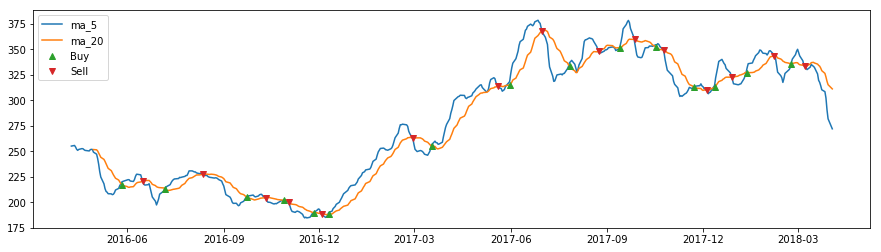

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(1,1, figsize=(15,4))
plt.plot(data.index, data.ma_5)
plt.plot(data.index, data.ma_20)
plt.plot(data.ix[data.buy  == True].index, data[data.buy  == True].ma_20, '^', label='Buy')
plt.plot(data.ix[data.sell == True].index, data[data.sell == True].ma_20, 'v', label='Sell')
plt.legend(loc='best'); plt.show()

In [4]:
# 위를 종합하여 1개의 함수로 생성하기
# short_ma, long_ma  # 단기 이동평균, 장기 이동평균
def stock_check_plot(code, period = '2Y', short_ma = 5, long_ma = 20):

    from googlefinance.get import get_data
    ohlc = get_data(code, period)
    ms = ohlc.Close.rolling(short_ma).mean()
    ml = ohlc.Close.rolling(long_ma).mean()
    ohlc['ma_' + str(short_ma) ] = ohlc['Close'].rolling(window=short_ma, center=False).mean()
    ohlc['ma_' + str(long_ma) ]  = ohlc['Close'].rolling(window=long_ma , center=False).mean()
    ohlc['diff']  = ohlc['ma_' + str(short_ma)] - ohlc['ma_' + str(long_ma)]
    ohlc['buy']   = (ms>ml) & (ms.shift()<ml.shift())  # 이동평균선 교차상승 (조건만족시 True/False)
    ohlc['sell']  = (ms<ml) & (ms.shift()>ml.shift())  # 이동평균선 교차하락 (조건만족시 True/False)
    ohlc['hold']  = (ms>ml)
    data = ohlc.drop(columns='Code')
    
    import matplotlib.pyplot as plt
    plt.subplots(1,1, figsize=(25,7))
    #plt.plot(data.index, data.Close)
    plt.plot(data.index, data['ma_' + str(short_ma) ])
    plt.plot(data.index, data['ma_' + str(long_ma)  ])
    plt.plot(data.ix[data.buy  == True].index, data[data.buy  == True]['ma_' + str(long_ma) ], '^', label='Buy')
    plt.plot(data.ix[data.sell == True].index, data[data.sell == True]['ma_' + str(long_ma) ], 'v', label='Sell')
    #plt.plot(data.ix[data.hold == True].index, data[data.hold == True]['ma_' + str(long_ma) ], '^', label='hold')
    plt.legend(loc='best'); plt.show()
    return data.reset_index()

/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


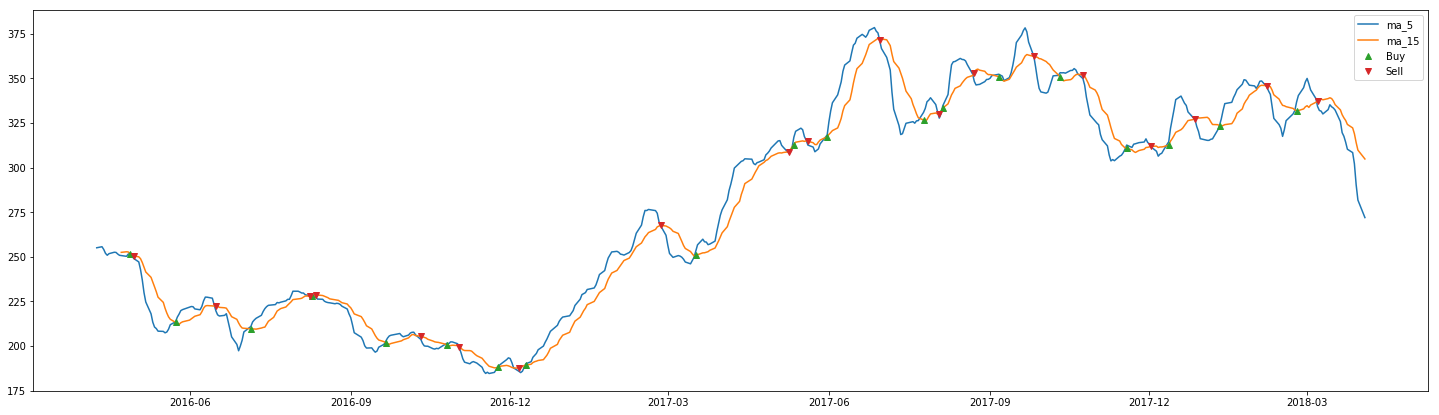

,Date,Open,High,Low,Close,Volume,ma_5,ma_15,diff,buy,sell,hold
0,2016-04-05,249.12,252.12,243.64,246.99,13289584,NaN,NaN,NaN,False,False,False
1,2016-04-06,240.50,256.56,240.00,255.47,9915160,NaN,NaN,NaN,False,False,False


In [5]:
stock = stock_check_plot(code,'2Y',5,15)
stock.head(2)

<br>
### **02 매수/ 매도시점 의 주가 시뮬레이션 하기**
매수/ 매도시점에 1주씩 매수/ 매도

In [6]:
# 매도시점 추출
import pandas as pd
sell_point = stock[stock.sell].loc[:, ['Date','sell']]
buy_point  = stock[stock.buy].loc[:,  ['Date','buy']]
points = pd.concat([sell_point, buy_point], axis=0)
points = points.sort_values('Date')
points.head(3)

,Date,buy,sell
17,2016-04-28,True,NaN
19,2016-04-30,NaN,True
35,2016-05-24,True,NaN


In [7]:
# 매도 매수시점
result = []
for no in range(len(points)):
    if points.iloc[no,:].buy == True:
        result.append('buy')
    if points.iloc[no,:].sell == True:
        result.append('sell')
del points['buy']
del points['sell']
points['check'] = result
points = points.reset_index()
del points['index']

# 해당 시점의 종가 추출하기
price = [int(stock[stock.Date == date].Close)  for date in points.Date]
points['price'] = price
points.head()

,Date,check,price
0,2016-04-28,buy,251
1,2016-04-30,sell,240
2,2016-05-24,buy,216
3,2016-06-16,sell,217
4,2016-07-06,buy,213


[-0.04250996015936255,
 0.0044907407407407405,
 0.0592018779342723,
 -0.021179039301310043,
 -0.019019607843137255,
 -0.05762376237623762,
 -0.035181347150259064,
 0.32838541666666665,
 0.1666030534351145,
 -0.03904024767801857,
 0.07238805970149254,
 -0.048216374269005845,
 -0.04087078651685393,
 -0.013896848137535818,
 -0.0491830985915493,
 -0.027714285714285712,
 -0.03253048780487805,
 0.0,
 -0.05046242774566474]

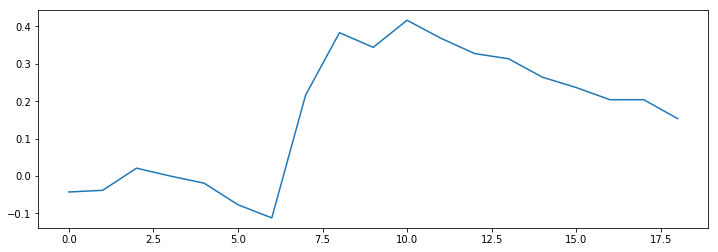

In [15]:
# 매수 매도시점 가격변화 기록하기
result, price = [], 0
for no, chk in enumerate(points.check):
    if no == 0   and chk == 'sell':
        result.append(np.NaN)
    elif chk == 'buy':
        price = 0
        price = int(points.price[no])
    elif chk == 'sell':
        chg = ((int(points.price[no]) - price)/price) * 0.97
        result.append(chg)
pd.Series(result).cumsum().plot(figsize=(12,4))
result

<br>
### **03 종합함수 만들기**
매수/ 매도시점에 1주씩 매수/ 매도

In [9]:
%matplotlib inline
class stock_backtest:
    
    def get_price(self, code, period = '2Y'):
        from googlefinance.get import get_data
        return get_data(code, period)

    def get_table(self, code, period = '2Y', short_ma = 5, long_ma = 20, fee=0.03):
        ohlc = self.get_price(code, period) # 주가정보 수집
        return self.get_mscv_table(ohlc, short_ma=short_ma, long_ma=long_ma) # 이동평균 계산 

    def get_portfolio(self, code, period = '2Y', short_ma = 5, long_ma = 20, fee=0.03):
        ohlc = self.get_price(code, period) # 주가정보 수집
        ohlc = self.get_mscv_table(ohlc, short_ma=short_ma, long_ma=long_ma) # 이동평균 계산 
        return self.get_portfolio(ohlc, fee=fee)     # 이동평균의 수익률 계산


    # stock : 주가 가격정보 수집 및 이동평균 매수/ 매도 지점 계산
    def get_mscv_table(self, ohlc, short_ma = 5, long_ma = 20):
        import pandas as pd
        ms = ohlc.Close.rolling(short_ma).mean()
        ml = ohlc.Close.rolling(long_ma).mean()
        ohlc['ma_' + str(short_ma) ] = ohlc['Close'].rolling(window=short_ma, center=False).mean()
        ohlc['ma_' + str(long_ma) ]  = ohlc['Close'].rolling(window=long_ma , center=False).mean()
        ohlc['diff'] = ohlc['ma_' + str(short_ma)] - ohlc['ma_' + str(long_ma)]
        ohlc['sell'] = (ms<ml) & (ms.shift()>ml.shift())  # 단기평균이 치고 오름 (조건만족시 True/False)
        ohlc['buy']  = (ms>ml) & (ms.shift()<ml.shift())  # 단기평균이 뚫고 내림 (조건만족시 True/False)
        ohlc = ohlc.drop(columns='Code')
        ohlc = ohlc.reset_index()
        ohlc['Date'] = pd.to_datetime(ohlc['Date'])
        return ohlc

    
    def get_mscv_portfolio(self, ohlc, fee=0.03, display=False):
        import pandas as pd
        sell_point = ohlc[ohlc.sell].loc[:,['Date','sell']]
        buy_point  = ohlc[ohlc.buy].loc[:, ['Date', 'buy']]
        points = pd.concat([sell_point, buy_point], axis=0)

        result = []
        for no in range(len(points)):
            if points.iloc[no,:].sell == True:
                result.append('sell')
            if points.iloc[no,:].buy == True:
                result.append('buy')
        del points['buy']
        del points['sell']

        price = [int(ohlc[ohlc.Date == date].Close)  for date in points.Date]
        points['price'] = price
        points['chk'] = result
        points = points.sort_values('Date')

        # portfolio 수익률 계산하기
        change, close, date = [], [], []
        points_price = points.price.tolist()
        points_date  = points.Date.tolist()
        for no, chk in enumerate(points.chk):
            if chk == 'sell' and no != 0 :                # 매수시점 : 종가로 구매를 한다
                price_present = int(points_price[no])
                price_buy     = int(points_price[no-1])
                change_pct    = ((price_present - price_buy)/price_buy) * (1-fee)

                change.append(round(change_pct, 4))
                close.append(points_price[no])
                date.append(points_date[no])

        result = pd.DataFrame()
        result['chg'] = change
        result['close'] = close
        result.index = date
        result.index = pd.to_datetime(result.index)
        
        if display :
            import matplotlib.pyplot as plt
            plt.figure(figsize=(8,3))
            plt.plot(result.chg.cumsum(),                color='r', label='protfolio')
            plt.plot(result.close.pct_change().cumsum(), color='g', label='Close')
            plt.legend(loc='best')
            plt.grid()
            plt.show()
        return result
                                    
    # 데이터 시각화
    def plot(self, stock):
        import matplotlib.pyplot as plt
        plt.subplots(1,1, figsize=(15,5))
        plt.plot(stock.index, stock[ stock.columns[6] ])
        plt.plot(stock.index, stock[ stock.columns[7] ])
        plt.plot(stock.ix[stock.buy  == True].index, stock[stock.buy  == True][stock.columns[7] ], '^', label='Buy')
        plt.plot(stock.ix[stock.sell == True].index, stock[stock.sell == True][stock.columns[6] ], 'v', label='Sell')
        plt.legend(loc='best')
        plt.show()

In [81]:
# 분석할 기업들 추출하기
name = 'LG'

import pandas as pd
codes = pd.read_csv('./data/krx_code.csv', encoding='ms949')
code_dict = {}
for no in range(len(codes)):
    nam = codes.iloc[no,1]
    cod  = codes.iloc[no,0]
    if nam.find(name) != -1:
        code_dict[nam] = cod
code_dict

{'LG': 'KRX:003550',
 'LG디스플레이': 'KRX:034220',
 'LG상사': 'KRX:001120',
 'LG생활건강': 'KRX:051900',
 'LG생활건강우': 'KRX:051905',
 'LG우': 'KRX:003555',
 'LG유플러스': 'KRX:032640',
 'LG이노텍': 'KRX:011070',
 'LG전자': 'KRX:066570',
 'LG전자우': 'KRX:066575',
 'LG하우시스': 'KRX:108670',
 'LG하우시스우': 'KRX:108675',
 'LG화학': 'KRX:051910',
 'LG화학우': 'KRX:051915'}

LG화학


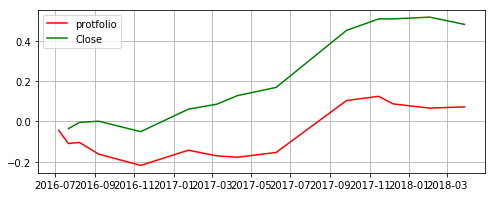

LG생활건강


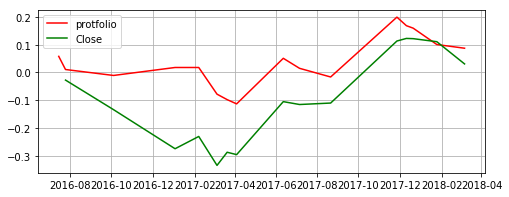

LG전자


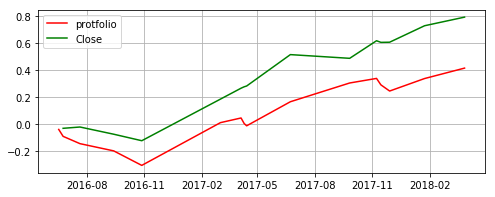

LG


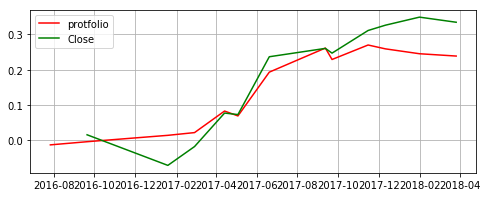

LG디스플레이


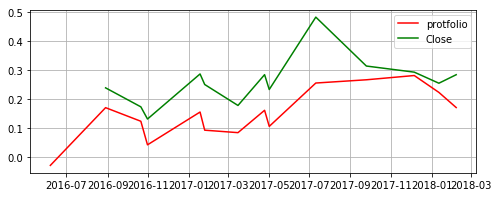

LG유플러스


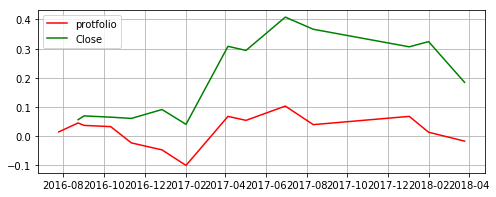

LG이노텍


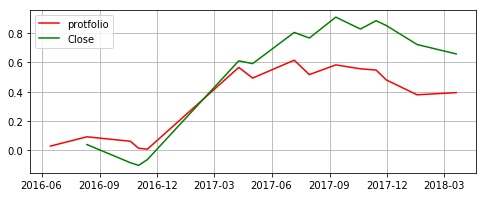

LG화학우


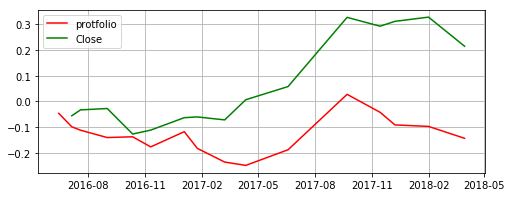

LG생활건강우


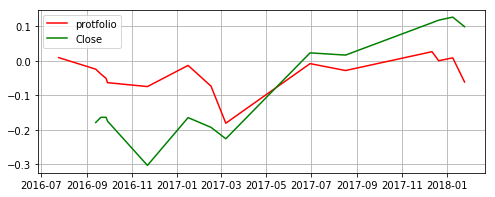

LG상사


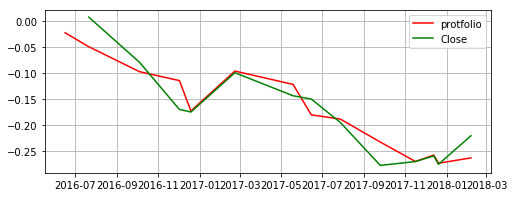

LG하우시스


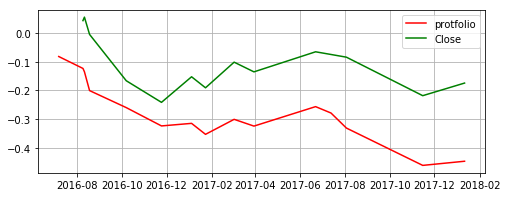

LG전자우


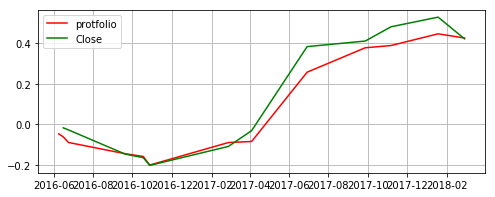

LG우


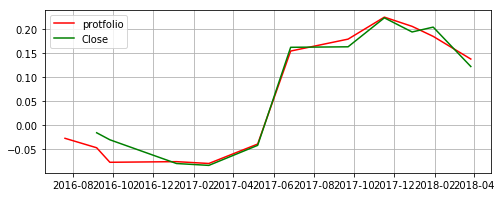

LG하우시스우


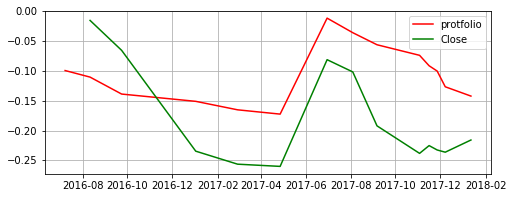

In [82]:
fin = stock_backtest()
for cod in code_dict:
    print(cod)
    df = fin.get_table(code_dict[cod])
    df_port = fin.get_mscv_portfolio(df, display=True)

In [11]:
# 결과
# SK하이닉스, 코스맥스, 등의 보합종목은 크게 손해는 안본다
# 대신 삼성전자, 하이닉스 등의 대세종목에서는 큰 수익은 없어도 손해없이 운영이 가능하다

# **Notes**

<br>
## **2 pip install bt**
<img src='http://pmorissette.github.io/bt/_static/logo.png' align='left'>
[Document](http://pmorissette.github.io/bt/) &nbsp;&nbsp; [User Blog](http://quantlabs.net/)

In [28]:
import bt

# 분석을 위한 금융데이터 불러오기 (종가 추출한다)
data = bt.get('TSLA', start='2010-01-01')
data.head(2)

[*********************100%***********************]  1 of 1 downloaded


,tsla
Date,
2010-06-29,23.889999
2010-06-30,23.830000


In [29]:
# backtest할 전략을 정의한다
s = bt.Strategy('plan01', [bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

In [30]:
# 정의한 전략을 backtest 한다
test = bt.Backtest(s, data)
res = bt.run(test)

plan01
0% [############################# ] 100% | ETA: 00:00:00

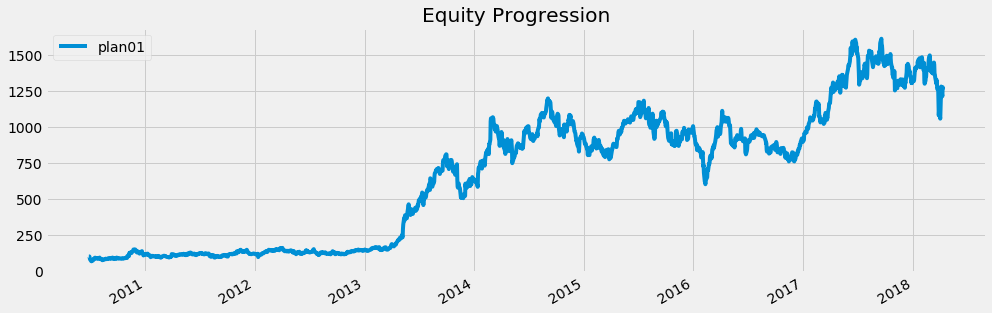

In [31]:
# first let's see an equity curve
res.plot()

In [32]:
res.display_monthly_returns()

  Year     Jan    Feb     Mar     Apr     May    Jun     Jul     Aug     Sep     Oct     Nov     Dec     YTD
------  ------  -----  ------  ------  ------  -----  ------  ------  ------  ------  ------  ------  ------
  2010    0      0       0       0       0     -0.25  -16.32   -2.31    4.77    7.01   61.77  -24.62   11.47
  2011   -9.5   -0.87   16.16   -0.54    9.2   -3.35   -3.3   -12.18   -1.41   20.42   11.47  -12.77    7.25
  2012    1.79  14.93   11.46  -11.04  -10.96   6.07  -12.37    4.01    2.66   -3.93   20.23    0.15   18.59
  2013   10.75  -7.14    8.79   42.49   81.07   9.82   25.07   25.86   14.42  -17.29  -20.42   18.19  344.14
  2014   20.59  34.95  -14.85   -0.27   -0.06  15.54   -6.98   20.78  -10.02   -0.4     1.17   -9.04   47.85
  2015   -8.46  -0.13   -7.17   19.75   10.95   6.96   -0.79   -6.42   -0.26  -16.69   11.27    4.23    7.91
  2016  -20.34   0.38   19.72    4.78   -7.28  -4.91   10.6    -9.7    -3.76   -3.09   -4.21   12.82  -10.97
  2017   17.9   -0.

<br>
## **3 pip install backtrader**
https://github.com/backtrader/backtrader
1. import argparse 의 파라미터를 외부에서 가져오는 정보 때문에 ipython 내부에서 실행시 오류가 발생
1. SystemExit: 2 - An exception has occurred, use %tb to see the full traceback.
1. https://www.backtrader.com/docu/cerebro.html?highlight=plot#backtrader.Cerebro.plot

In [14]:
from googlefinance.get import get_data
data = get_data('NASDAQ:TSLA', '2Y')
data.head(2)

,code,open,high,low,close,volume
date,,,,,,
2016-04-14,NASDAQ:TSLA,248.51,255.500,247.3300,254.53,4917930
2016-04-15,NASDAQ:TSLA,253.00,256.839,251.0501,251.86,4119980


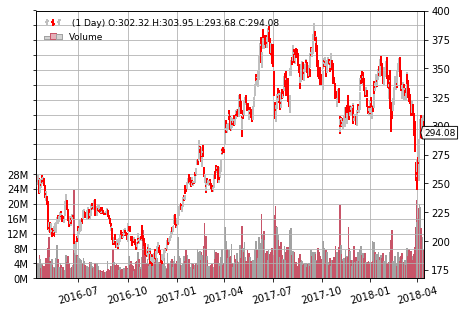

[[<Figure size 432x288 with 2 Axes>]]

In [16]:
import warnings
warnings.filterwarnings("ignore")

import backtrader as bt
import backtrader.feeds as btfeeds

data_bt  = bt.feeds.PandasData(dataname=data)

cerebro = bt.Cerebro(stdstats=False)      # cerebro entity 생성하기
cerebro.addstrategy(bt.Strategy)          # Add a strategy
cerebro.adddata(data_bt) 
cerebro.run()             # Run over everything
cerebro.plot(style='bar', iplot=True, width=20, height=15, dpi=300) # Plot the result

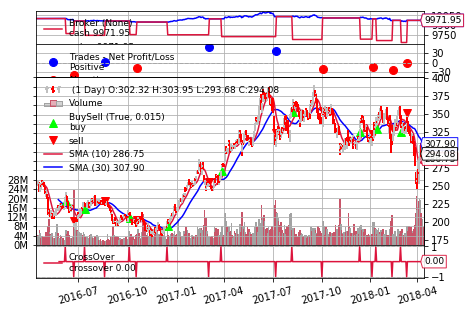

[[<Figure size 432x288 with 5 Axes>]]

In [17]:
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

# **NOTE**: Read the note about the Yahoo API above. This sample is kept for
# historical reasons. Use any other data feed.
data_bt  = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_bt)

cerebro.run()
cerebro.plot(iplot=False , width=20, height=15, dpi=300)

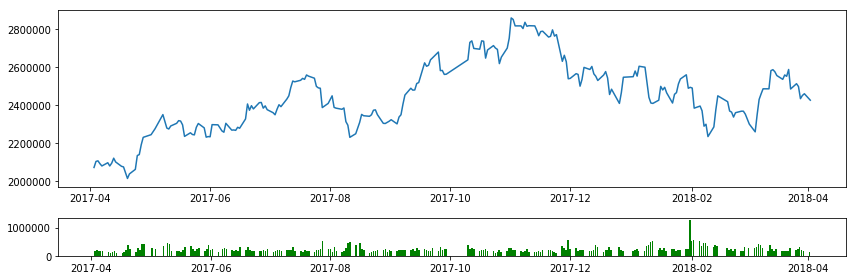

In [12]:
%matplotlib inline
# 출처 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot2grid.html
#  matplotlib.pyplot.subplot2grid( (row, col), (시작점), rowspan=1, colspan=1, fig=None, **kwargs)
import matplotlib.pyplot as plt
from googlefinance.get import get_data

# Canvas 크기값 설정
fig      = plt.figure(figsize=(12, 4)) 
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bot_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

ss_history = get_data('KRX:005930', period='1Y')
top_axes.plot(ss_history.index, ss_history.Close, label='Adjusted Close')
bot_axes.bar( ss_history.index, ss_history.Volume, color='green')
plt.tight_layout() # 자동으로 최대크기의 그림으로 출력
plt.show()

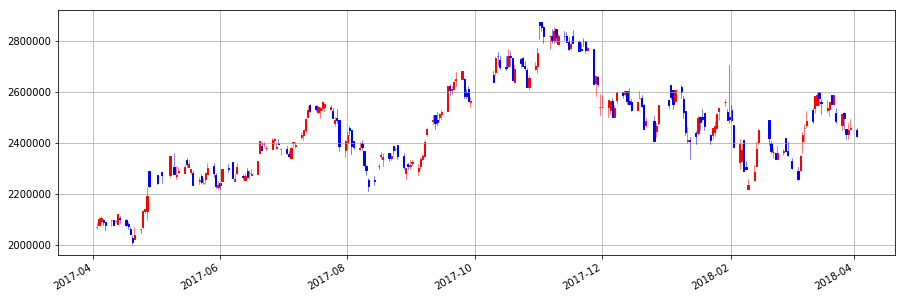

In [13]:
import matplotlib.finance as mpf
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 5))
data_stock = ss_history.iloc[:,1:-1].reset_index()
data_stock['Date'] = data_stock['Date'].map(mdates.date2num)   # Date 컬럼을 matplot 포맷으로 변환
mpf.candlestick_ohlc(ax, data_stock.values, 
                     width=0.6, colorup='r', colordown='b')    # UP:red, Down:blue
ax.xaxis_date(); ax.autoscale_view(); fig.autofmt_xdate()      # x 축에 날짜를 추가한다
plt.grid(True)

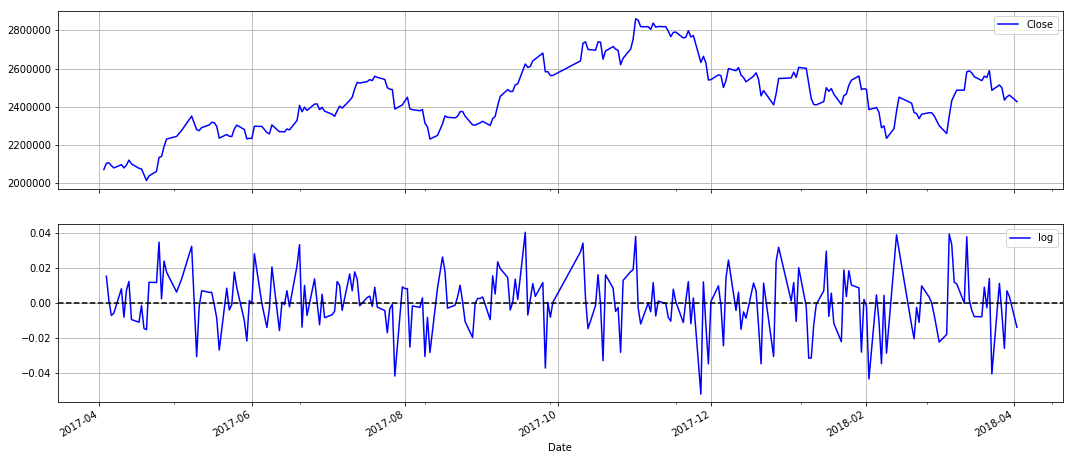

In [14]:
import numpy as np

# Close Trand Analysis
# .pct_change() : 퍼센트 변화율 갑승로 변환
stock_history = ss_history
stock_history['log'] = round( np.log(stock_history['Close'] / stock_history['Close'].shift(1)), 7)
stock_history[['Close', 'log']].plot(subplots=True, style='b', figsize=(18, 8), grid=True)
plt.axhline(y = 0, linestyle = '--', color = 'k')

In [ ]:
# 이동평균선의 활용은 그래프의 기울기와 밀접하다
# 가격의 Log 변화율에 따른 구간의 구분과
# 구간 별 이동평균선 적용은 Mixed Gaussian 방법으로 혼합해서 적용하면
# 보다 안정적이고 무엇보다 "예측 가능한 전망' 및 적용이 가능하다

<br>
### **02 Python 모듈을 활용**
! pip install pinkfish
1. OpenSorce 문제점과 의 한계
1. https://github.com/ematvey/pybacktest
1. http://nbviewer.jupyter.org/github/ematvey/pybacktest/blob/master/examples/tutorial.ipynb
1. zipline 이라는 오래된 모듈이 있지만, Pandas 0.22를 반영못하고, Yahoo API가 막힘으로써 전혀 작동을 못함
1. https://github.com/fja05680/pinkfish/blob/master/examples/golden-cross-plus/strategy.ipynb

## **1. Zipline 수정하기**
1. 현재는 Miniconda로 설치후,
1. https://www.youtube.com/watch?v=Fg-hHwlb2Ik ikernel에 quant를 추가해서 실행
1. Python 3.4에서 실행중

1. zipline 수정하는 방법(그런데 잘 안된다... ㅜㅜㅜ)
1. https://github.com/quantopian/zipline/issues/2043
1. ! pip install zipline --no-cache-dir
1. ! pip install pandas --upgrade
1. cd /usr/local/lib/python3.5/dist-packages/zipline/_protocol.pyx
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/algorithm.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/performance/tracker.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/risk/trading.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/data/data_portal.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/data/history_loader.py
        from)) pandas.tseries.tools import normalize_date
        to)) from pandas._libs.tslib import normalize_date
1. cd /usr/local/lib/python3.5/dist-packages/zipline/finance/data/loader.py
        data_reader
1. cd /usr/local/lib/python3.5/dist-packages/zipline/data/benchmarks.py
        from)) data = pd_reader.DataReader(symbol,'google',first_date,last_date)
        to)) data = pd_reader.DataReader(symbol,'yahoo',first_date,last_date)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googlefinance.get import get_data_yahoo, get_data
from matplotlib import style
style.use('fivethirtyeight')

data = get_data('KRX:005930', '3Y')
data.head(3)

,code,open,high,low,close,volume
date,,,,,,
2015-04-15,KRX:005930,1460000.0,1470000.0,1427000.0,1446000.0,269985
2015-04-16,KRX:005930,1462000.0,1477000.0,1447000.0,1477000.0,209588
2015-04-17,KRX:005930,1477000.0,1478000.0,1447000.0,1450000.0,198920


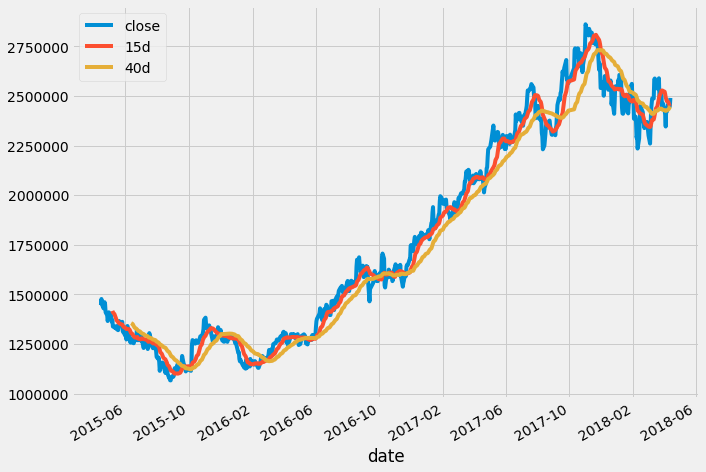

In [13]:
data['15d']=np.round(data['close'].rolling(window=15).mean(),2)
data['40d']=np.round(data['close'].rolling(window=40).mean(),2)
data['15d-40d']=data['15d']-data['40d']
data[['close','15d','40d']].plot(grid=True,figsize=(10,8))

 1    439
-1    260
 0     39
Name: Stance, dtype: int64


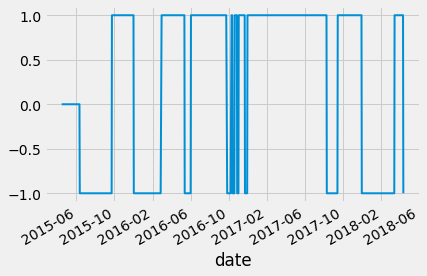

In [18]:
# 이동평균 교점에 따른 시간에 따른 신호데이터 생성
X = 10    # 매매구간 신호의 임계값을 10으로 가정
data['Stance'] = np.where(data['15d-40d']>X,  1, 0)                # True :  1 \ False : 0
data['Stance'] = np.where(data['15d-40d']<X, -1, data['Stance'])   # True : -1 \ False : Original Data
print(data['Stance'].value_counts())                               # 1 : 주식 매매기간 , -1 : 공매도 매매기간
data['Stance'].plot(lw = 2, ylim = [-1.1, 1.1])

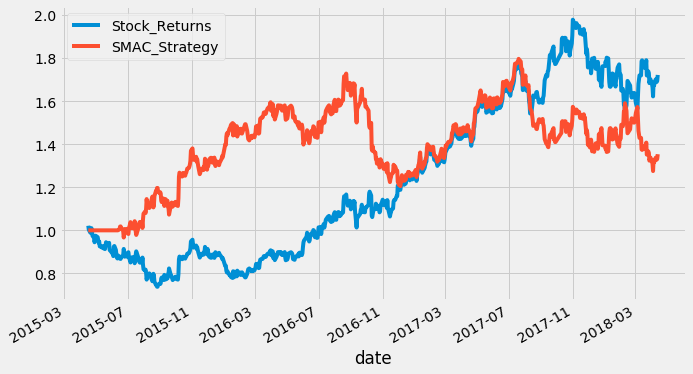

In [19]:
# 매매 수익률 계산

data['Stock_Returns'] = np.log(data['close'] / data['close'].shift(1))    # 일간 log() 변환데이터 생성
data['SMAC_Strategy'] = data['Stock_Returns'] * data['Stance'].shift(1)   # 매매 데이터를 1일 지연시키고, 시장 수익률을 곱한다
data[['Stock_Returns','SMAC_Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
#data[['Stock_Returns','SMAC_Strategy']].plot(grid = True, figsize = (10,6))
plt.show()